## Deep Neural Network Example-CNN

- Here we created every layer by row coding

Same example of the mnist dataset of hendwritting


1. Load Dataset


In [15]:
# import necessary library
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

# Data load as 2-tuple structure [input,target]
mnist_dataset, mnist_info = tfds.load(
    name="mnist", with_info=True, as_supervised=True)

mnist_train, mnist_test = mnist_dataset["train"], mnist_dataset["test"]

number_of_train_sample = mnist_info.splits["train"].num_examples
number_of_train_sample = tf.cast(number_of_train_sample, tf.int64)
print(f"train sample = {number_of_train_sample}")

number_of_validation_sample = 0.1 * mnist_info.splits["train"].num_examples

number_of_validation_sample = tf.cast(number_of_validation_sample, tf.int64)
print(f"validation sample = {number_of_validation_sample}")

number_of_test_sample = mnist_info.splits["test"].num_examples
number_of_test_sample = tf.cast(number_of_test_sample, tf.int64)
print(f"test sample = {number_of_test_sample}")


train sample = 60000
validation sample = 6000
test sample = 10000


2. Preprocessing Data

- Scale Data

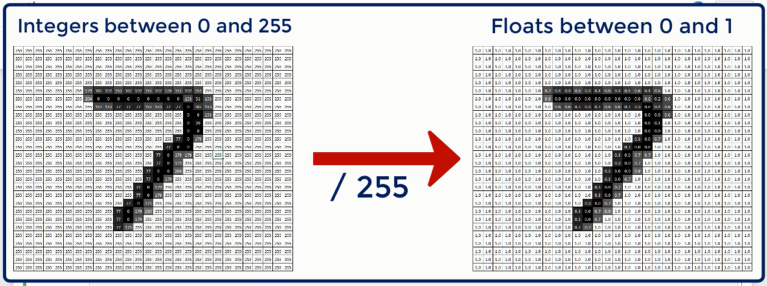

- Shuffle Data

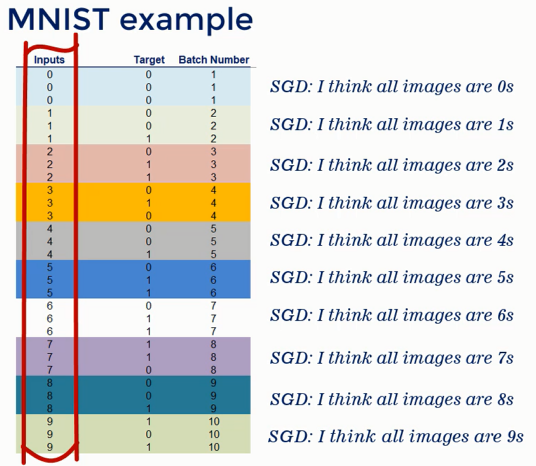

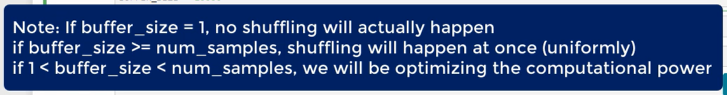

- Train Validation Test: We are taking validation from the trainset

- Batching: Accuracy and Speed Trade off of the cpu.

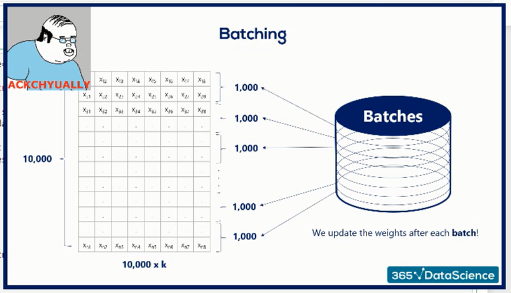
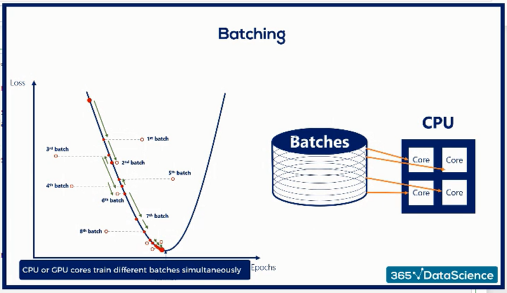

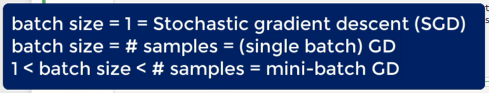

- Batching important for Train dataset only as it does back propagation. Validation dataset does not require Batching

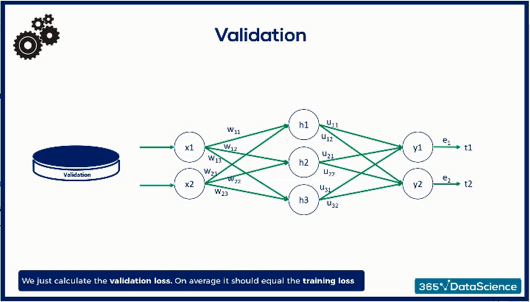


In [21]:
# Scaling function
def scale(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255
    return image, label


# Scaling train+validation
scaled_train_and_validation_data = mnist_train.map(scale)

# Scaling train+validation
test_data = mnist_test.map(scale)

# Shufflling data with 10000 sample per shuffle
BUFFER_SIZE = 10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(
    BUFFER_SIZE
)

# Train Validation Test

# Validation data: taking 0.1 % from train set

validation_data = shuffled_train_and_validation_data.take(number_of_validation_sample)

train_data = shuffled_train_and_validation_data.skip(number_of_validation_sample)

# Batch Size, which is also a hyperparameter
BATCH_SIZE = 100
train_data = train_data.batch(BATCH_SIZE)
validation_data = validation_data.batch(number_of_validation_sample)
test_data = test_data.batch(number_of_test_sample)

# Loads the next element of an iterable object
validation_inputs, validation_targets = next(iter(validation_data))

3. Model

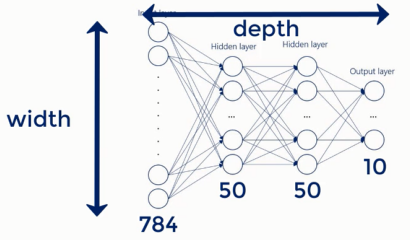
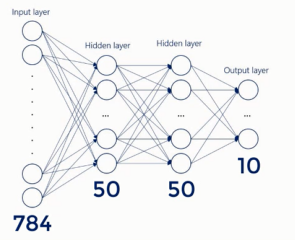

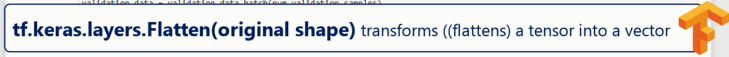
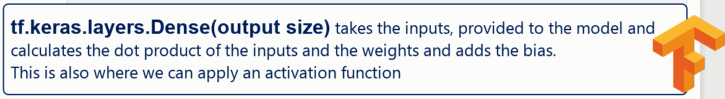


In [31]:
# outlien the model
input_size = 784
output_size = 10
hidden_layer_size = 100

# model
# 1st layer is input layer
# 2nd layer is hidden layer
# 3nd layer is hidden layer
# 4th layer is output layer

model = tf.keras.Sequential(
    [
        # input layer
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
        # 1st hidden layer
        tf.keras.layers.Dense(hidden_layer_size, activation="relu"),
        # 2nd hidden layer
        tf.keras.layers.Dense(hidden_layer_size, activation="relu"),
        # output layer
        tf.keras.layers.Dense(output_size, activation="softmax"),
    ]
)

4. Optimization Algorithm and Loss function


In [32]:
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

5. Training

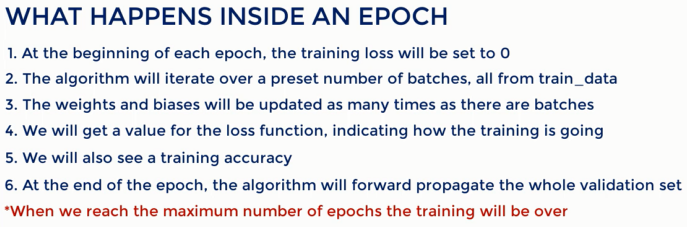

Epochs

- Batches - Execution time - train loss - train accuracy - validation loss - validation accuracy


In [37]:
NUM_EPOCHS = 5
# fit the model with train data and validation data
model.fit(
    train_data,
    epochs=NUM_EPOCHS,
    validation_data=(validation_inputs, validation_targets),
    verbose=2,
)
# Even after the first epoch we've had 540 different weight and bias updates
# val_accuracy = TRUE ACCURACY OF THE MODEL


Epoch 1/5


540/540 - 5s - loss: 0.0144 - accuracy: 0.9956 - val_loss: 0.0150 - val_accuracy: 0.9945 - 5s/epoch - 9ms/step
Epoch 2/5
540/540 - 4s - loss: 0.0084 - accuracy: 0.9979 - val_loss: 0.0082 - val_accuracy: 0.9982 - 4s/epoch - 7ms/step
Epoch 3/5
540/540 - 4s - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.0136 - val_accuracy: 0.9963 - 4s/epoch - 7ms/step
Epoch 4/5
540/540 - 3s - loss: 0.0098 - accuracy: 0.9970 - val_loss: 0.0135 - val_accuracy: 0.9958 - 3s/epoch - 6ms/step
Epoch 5/5
540/540 - 4s - loss: 0.0090 - accuracy: 0.9971 - val_loss: 0.0086 - val_accuracy: 0.9970 - 4s/epoch - 7ms/step


6. Test the Model

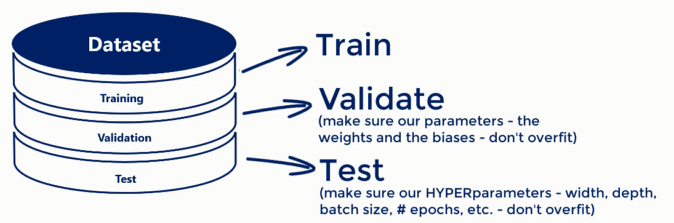

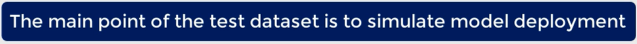

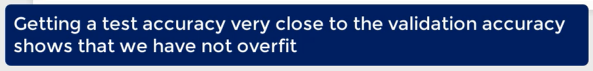


In [38]:
# test the model
test_loss, test_accuracy = model.evaluate(test_data)


1/1 [==============================] - 0s 428ms/step - loss: 0.1008 - accuracy: 0.9774
